In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [33]:
#Load the data
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")

In [34]:
#Scale data and remove NaNs
X_scaled = StandardScaler().fit_transform(X_train)

# Impute NaNs in X_scaled using column means
if np.isnan(X_scaled).any():
    imputer = SimpleImputer(strategy='mean')
    X_scaled_imputed = imputer.fit_transform(X_scaled)
else:
    X_scaled_imputed = X_scaled

In [36]:
#Creates a feature selector object that will select the 50 best features based on the anova F-value
selector = SelectKBest(score_func=f_classif, k=50)
#Applies the selector object to the data and creates a new matrix with the samples (rows) and 50 columns of the 50 genes that most influence the variability between samples
X_new = selector.fit_transform(X_scaled_imputed, y_train["characteristics_ch1"])
#Returns the column positions in the original matrix of the selected features
selected_indices = selector.get_support(indices=True)

/var/folders/cc/5bf3jh4x6877ddvnt36kvr8r0000gn/T/ipykernel_11200/1794815004.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_genes_df.head(20), x="Score", y="Gene", palette="viridis")


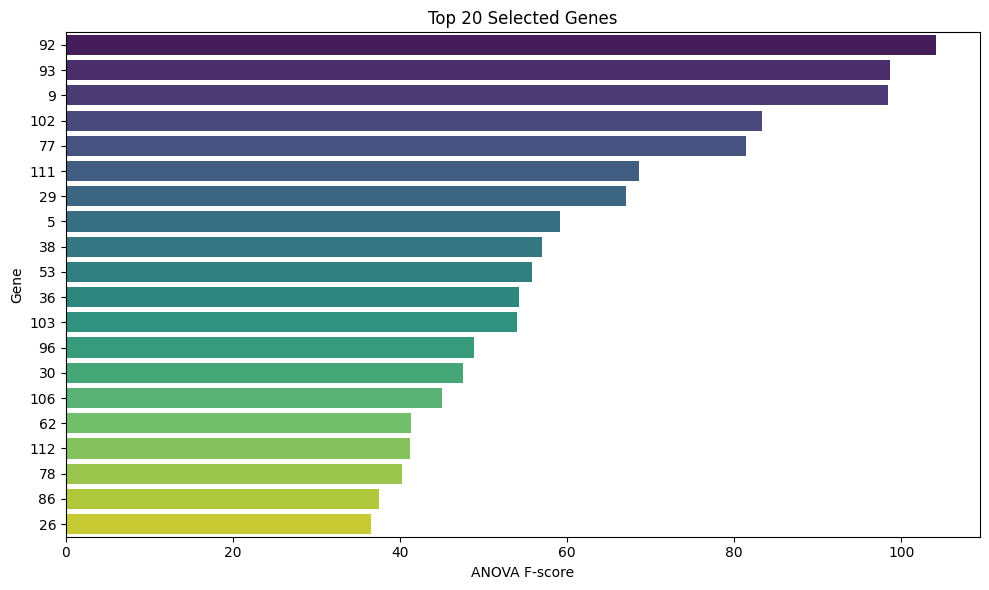

In [37]:
# Assume expr is your expression matrix (genes x samples) with gene names as index
# and selected_indices is from SelectKBest.get_support(indices=True)

gene_names = X_train.columns[selected_indices]
scores = selector.scores_[selected_indices]

# Create a DataFrame of top genes
selected_genes_df = pd.DataFrame({
    "Gene": gene_names,
    "Score": scores
}).sort_values(by="Score", ascending=False)

# Plot top 20 genes
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_genes_df.head(20), x="Score", y="Gene", palette="viridis")
plt.title("Top 20 Selected Genes")
plt.xlabel("ANOVA F-score")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

In [ ]:
#Take selected_genes_df["gene"] (or top N) and input into Enrichr, DAVID or g:profiler
#Look for enriched GO terms, KEGG pathways or disease associations
#Cross-check individual genes in pubmed to see if they have been linked to your disease